#Setting up Conda and Hugging face for dataset

In [ ]:
# !conda install pandas pyarrow

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [ ]:
# !conda install -c huggingface -c conda-forge datasets
# !conda install -c conda-forge fsspec
# !pip install hf_transfer

^C


In [ ]:
!pip install huggingface_hub

In [3]:
!huggingface-cli login

^C


# Downloading Dataset

In [3]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/sdiaeyu6n/tu-berlin/" + splits["train"])

In [5]:
df.head()

,image,label
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,73
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,46
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,111
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,95
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,74


In [13]:
!pip install datasets

# Importing the Datset

In [1]:
from datasets import load_dataset

dataset = load_dataset("sdiaeyu6n/tu-berlin", split="train")

print(dataset.features)
print(dataset.shape)



{'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['airplane', 'alarm clock', 'angel', 'ant', 'apple', 'arm', 'armchair', 'ashtray', 'axe', 'backpack', 'banana', 'barn', 'baseball bat', 'basket', 'bathtub', 'bear (animal)', 'bed', 'bee', 'beer-mug', 'bell', 'bench', 'bicycle', 'binoculars', 'blimp', 'book', 'bookshelf', 'boomerang', 'bottle opener', 'bowl', 'brain', 'bread', 'bridge', 'bulldozer', 'bus', 'bush', 'butterfly', 'cabinet', 'cactus', 'cake', 'calculator', 'camel', 'camera', 'candle', 'cannon', 'canoe', 'car (sedan)', 'carrot', 'castle', 'cat', 'cell phone', 'chair', 'chandelier', 'church', 'cigarette', 'cloud', 'comb', 'computer monitor', 'computer-mouse', 'couch', 'cow', 'crab', 'crane (machine)', 'crocodile', 'crown', 'cup', 'diamond', 'dog', 'dolphin', 'donut', 'door', 'door handle', 'dragon', 'duck', 'ear', 'elephant', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'feather', 'fire hydrant', 'fish', 'flashlight', 'floor lamp', 'flower with ste

# Mapping the Labels

In [4]:
label_names = dataset.features['label'].names

print(f"Number of classes: {len(label_names)}")
print(f"First few class names: {label_names[:5]}")

label_map = {i: name for i, name in enumerate(label_names)}

df['class_name'] = df['label'].map(label_map)

print(df[['label', 'class_name']].head())

Number of classes: 250
First few class names: ['airplane', 'alarm clock', 'angel', 'ant', 'apple']
   label      class_name
0     73             ear
1     46          carrot
2    111  human-skeleton
3     95          guitar
4     74        elephant


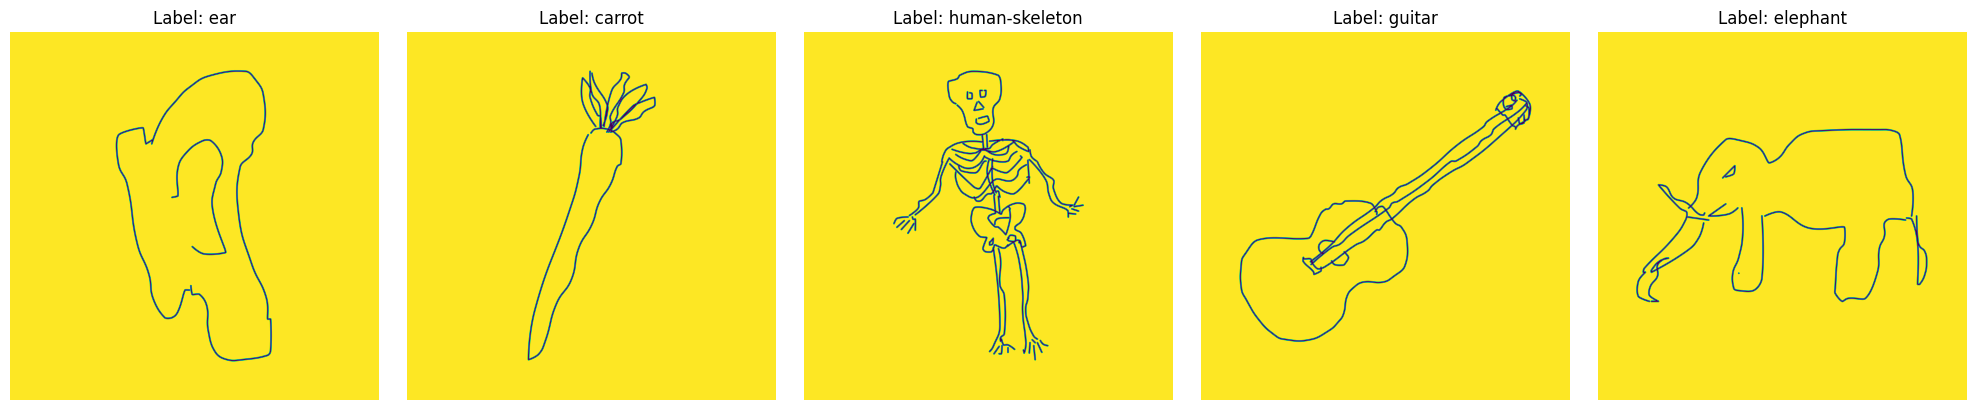

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import io

def display_image(image, label):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Label: {label}")

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    sample = dataset[i]
    image = sample['image']
    label = label_map[sample['label']]
    plt.subplot(1, 5, i+1)
    display_image(image, label)

plt.tight_layout()
plt.show()


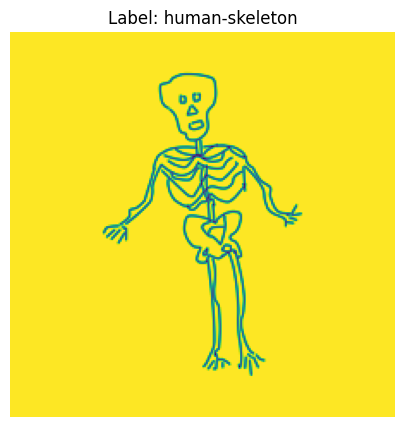

Image saved to third_image.jpg


In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import io

# Assume `dataset` is your dataset and `label_map` is your label mapping dictionary

# Function to display an image
def display_image(image, label):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Label: {label}")

# Get the 3rd image and label
sample = dataset[2]  # Index 2 for the 3rd image (zero-indexed)
image = sample['image']
label = label_map[sample['label']]

# Resize the image to 224x224
resized_image = image.resize((224, 224))

# Save the image as a JPEG file
output_path = 'third_image.jpg'
resized_image.save(output_path, format='JPEG')

# Display the image
plt.figure(figsize=(5, 5))
display_image(resized_image, label)
plt.show()

print(f"Image saved to {output_path}")


In [29]:
import numpy as np

# Check the contents of train_images.npz and train_labels.npz
images_path = "SketchClassifier/data/processed/train_images.npz"
labels_path = "SketchClassifier/data/processed/train_labels.npz"

with np.load(images_path) as images_data, np.load(labels_path) as labels_data:
    print("Images shape:", images_data['images'].shape)
    print("Labels shape:", labels_data['labels'].shape)


Images shape: (16000, 224, 224, 3)
Labels shape: (0,)


In [3]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"Is CUDA available? {cuda_available}")

# If CUDA is available, print the number of GPUs
if cuda_available:
    device_count = torch.cuda.device_count()
    print(f"Number of CUDA devices: {device_count}")
    for i in range(device_count):
        print(f"CUDA Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")

Is CUDA available? True
Number of CUDA devices: 1
CUDA Device 0: NVIDIA GeForce GTX 1650


In [1]:
!pip show torch torchvision torchaudio

In [12]:
!pip install mlflow


  Using cached mlflow-2.17.2-py3-none-any.whl.metadata (29 kB)
  Using cached mlflow_skinny-2.17.2-py3-none-any.whl.metadata (30 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached alembic-1.13.3-py3-none-any.whl.metadata (7.4 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.1-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached pyarrow-17.0.0-cp310-cp310-win_amd64.whl.metadata (3.4 kB)
  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached SQLAlchemy-2.0.36-cp310-cp310-win_amd64.whl.metadata (9.9 kB)
  Using cached waitress-3.0.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached click-8.1.7-py3-none-any

In [ ]:
import sys
import os
from src.models.train_model import train_model
import yaml
config_path = os.path.join("", "config/config.yaml")
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

train_model(config)

TypeError: train_model() got an unexpected keyword argument 'verbose'

In [3]:
import numpy as np
import os
processed_dir = "data\processed"
    # Load processed training data
train_images_file = os.path.join(processed_dir, 'train_images.npz')
train_labels_file = os.path.join(processed_dir, 'train_labels.npz')
test_images_file = os.path.join(processed_dir, 'test_images.npz')
test_labels_file = os.path.join(processed_dir, 'test_labels.npz')

# Check if files exist
if not all(os.path.exists(file) for file in [train_images_file, train_labels_file, test_images_file, test_labels_file]):
    raise FileNotFoundError("Processed data files not found. Please run preprocess_data first.")

# Load train images and labels
train_images = np.load(train_images_file)['images']
train_labels = np.load(train_labels_file)['labels']

# Load test images and labels
test_images = np.load(test_images_file)['images']
test_labels = np.load(test_labels_file)['labels']

In [5]:
train_images_file = os.path.join(processed_dir, 'X_val.npz')
train_images = np.load(train_images_file)['images']

print(train_images.shape)


(19200, 224, 224)


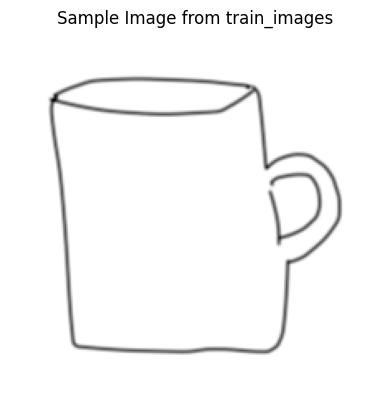

In [12]:
import matplotlib.pyplot as plt

# Assuming train_images is already a NumPy array with shape (16000, 224, 224)
# Displaying the first image in the dataset

# Select an image to display
sample_image = train_images[455]

# Display the image
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Image from train_images")
plt.axis('off')  # Hide axes for a cleaner view
plt.show()


In [25]:
!pip install albumentations




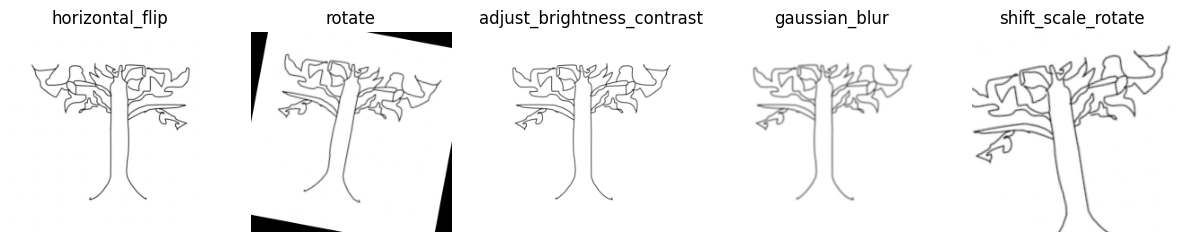

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Sample image from your dataset
sample_image = train_images[0]  # Assuming `train_images` is defined

# Define augmentation functions with adjusted parameters
def horizontal_flip(image):
    return cv2.flip(image, 1)

def rotate(image, angle=None):
    if angle is None:
        angle = np.random.uniform(-30, 30)  # Reduced to -30 to 30 degrees
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

def adjust_brightness_contrast(image, alpha=None, beta=None):
    if alpha is None:
        alpha = np.random.uniform(0.9, 1.1)  # Reduced to 0.9 to 1.1 for subtle contrast changes
    if beta is None:
        beta = np.random.randint(-30, 30)    # Reduced to -30 to 30 for more controlled brightness
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def gaussian_blur(image):
    ksize = np.random.choice([3, 5])  # Limited to 3 and 5 to prevent heavy blurring
    return cv2.GaussianBlur(image, (ksize, ksize), 0)

def shift_scale_rotate(image, shift_x=None, shift_y=None, scale=None, angle=None):
    (h, w) = image.shape[:2]
    if angle is None:
        angle = np.random.uniform(-15, 15)  # Keep within a small range
    if shift_x is None:
        shift_x = np.random.uniform(-0.1, 0.1)  # Reduced shift for better object preservation
    if shift_y is None:
        shift_y = np.random.uniform(-0.1, 0.1)  # Reduced shift for better object preservation
    if scale is None:
        scale = np.random.uniform(0.9, 1.5)  # Restricted to avoid extreme resizing

    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    M[0, 2] += shift_x * w
    M[1, 2] += shift_y * h
    return cv2.warpAffine(image, M, (w, h))

# Apply and display each transformation
transformations = [
    horizontal_flip,
    rotate,
    adjust_brightness_contrast,
    gaussian_blur,
    shift_scale_rotate
]

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, transform in enumerate(transformations):
    augmented = transform(sample_image)
    axs[i].imshow(cv2.cvtColor(augmented, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
    axs[i].axis('off')
    axs[i].set_title(transform.__name__)

plt.show()


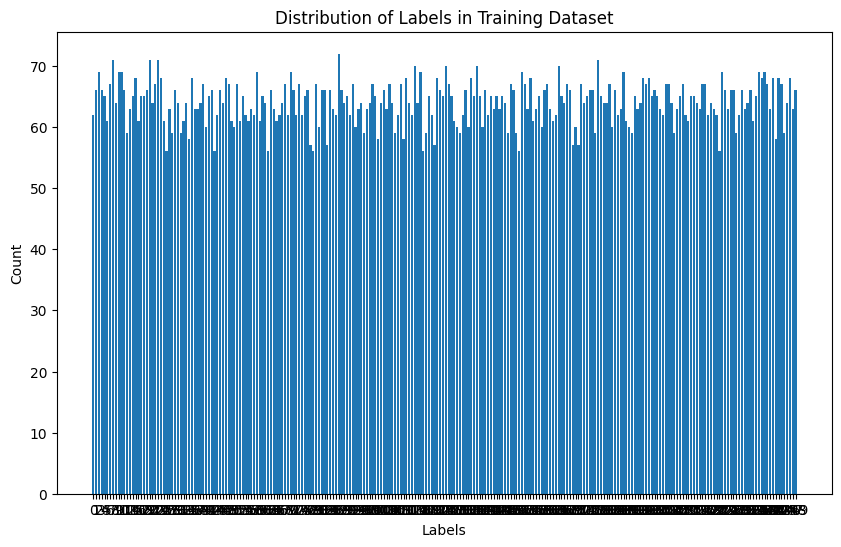

In [22]:
import matplotlib.pyplot as plt

# Assuming cleaned_distribution is a dictionary with label counts
# Example: cleaned_distribution = {0: 5000, 1: 3000, 2: 2500, ...}

# Plot histogram
labels = list(cleaned_distribution.keys())
counts = list(cleaned_distribution.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, width=0.8, align='center')
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Labels in Training Dataset")
plt.xticks(labels)  # Show all labels on x-axis
plt.show()



In [14]:
from PIL import Image
import numpy as np
import os, time
import torch
from torchvision import datasets, transforms, models


net = models.resnet18(pretrained=True)
# Convert model to grayscale
net.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Update the fully connected layer based on the number of classes in the dataset
net.fc = torch.nn.Linear(net.fc.in_features, 250)



c:\ProgramData\Anaconda\envs\deeplearning\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda\envs\deeplearning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Hoyath Personal/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 31.4MB/s]


In [15]:
print(net)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
model = models.vgg19(weights=None)




In [18]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [7]:
import os
import yaml
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image

# Custom Dataset Class
class SketchDataset(Dataset):
    def __init__(self, data_path, label_path, transform=None):
        self.data = np.load(data_path)['images']
        self.labels = np.load(label_path)['labels']
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = int(self.labels[idx])
        image = Image.fromarray(image.astype('uint8'), mode='L')
        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)
        return image, label


In [8]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b0

import torch
import torch.nn as nn
from torchvision.models import efficientnet_b0

def get_efficientnet_b0_single_channel(num_classes, dropout_rate=0.5):
    # Load the pre-trained EfficientNet-B0 model
    efficientnet = efficientnet_b0(pretrained=True)
    
    # Modify the first convolutional layer to accept single-channel input
    original_conv1 = efficientnet.features[0][0]
    efficientnet.features[0][0] = nn.Conv2d(
        in_channels=1,
        out_channels=original_conv1.out_channels,
        kernel_size=original_conv1.kernel_size,
        stride=original_conv1.stride,
        padding=original_conv1.padding,
        bias=(original_conv1.bias is not None)
    )
    
    # Copy and average the weights from the original conv1 layer
    with torch.no_grad():
        efficientnet.features[0][0].weight = nn.Parameter(
            original_conv1.weight.mean(dim=1, keepdim=True)
        )
    
    # Add dropout after some of the convolutional blocks (optional)
    # Example: add dropout after the first block
    efficientnet.features[1].add_module("dropout", nn.Dropout(p=dropout_rate))
    
    # Replace the classifier with dropout and a new fully connected layer
    efficientnet.classifier = nn.Sequential(
        nn.Dropout(p=dropout_rate),  # Add dropout before the final layer
        nn.Linear(efficientnet.classifier[1].in_features, num_classes)
    )
    
    return efficientnet


# Usage
def load_model(num_classes):
    model = get_efficientnet_b0_single_channel(num_classes=num_classes)
    return model

In [ ]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

label_map = {
    0: "airplane", 1: "alarm clock", 2: "angel", 3: "ant", 4: "apple", 5: "arm", 6: "armchair", 7: "ashtray", 8: "axe",
    9: "backpack", 10: "banana", 11: "barn", 12: "baseball bat", 13: "basket", 14: "bathtub", 15: "bear (animal)", 
    16: "bed", 17: "bee", 18: "beer-mug", 19: "bell", 20: "bench", 21: "bicycle", 22: "binoculars", 23: "blimp", 
    24: "book", 25: "bookshelf", 26: "boomerang", 27: "bottle opener", 28: "bowl", 29: "brain", 30: "bread", 
    31: "bridge", 32: "bulldozer", 33: "bus", 34: "bush", 35: "butterfly", 36: "cabinet", 37: "cactus", 38: "cake", 
    39: "calculator", 40: "camel", 41: "camera", 42: "candle", 43: "cannon", 44: "canoe", 45: "car (sedan)", 
    46: "carrot", 47: "castle", 48: "cat", 49: "cell phone", 50: "chair", 51: "chandelier", 52: "church", 
    53: "cigarette", 54: "cloud", 55: "comb", 56: "computer monitor", 57: "computer-mouse", 58: "couch", 59: "cow", 
    60: "crab", 61: "crane (machine)", 62: "crocodile", 63: "crown", 64: "cup", 65: "diamond", 66: "dog", 
    67: "dolphin", 68: "donut", 69: "door", 70: "door handle", 71: "dragon", 72: "duck", 73: "ear", 74: "elephant", 
    75: "envelope", 76: "eye", 77: "eyeglasses", 78: "face", 79: "fan", 80: "feather", 81: "fire hydrant", 82: "fish",
    83: "flashlight", 84: "floor lamp", 85: "flower with stem", 86: "flying bird", 87: "flying saucer", 88: "foot", 
    89: "fork", 90: "frog", 91: "frying-pan", 92: "giraffe", 93: "grapes", 94: "grenade", 95: "guitar", 96: "hamburger", 
    97: "hammer", 98: "hand", 99: "harp", 100: "hat", 101: "head", 102: "head-phones", 103: "hedgehog", 104: "helicopter", 
    105: "helmet", 106: "horse", 107: "hot air balloon", 108: "hot-dog", 109: "hourglass", 110: "house", 
    111: "human-skeleton", 112: "ice-cream-cone", 113: "ipod", 114: "kangaroo", 115: "key", 116: "keyboard", 117: "knife", 
    118: "ladder", 119: "laptop", 120: "leaf", 121: "lightbulb", 122: "lighter", 123: "lion", 124: "lobster", 
    125: "loudspeaker", 126: "mailbox", 127: "megaphone", 128: "mermaid", 129: "microphone", 130: "microscope", 
    131: "monkey", 132: "moon", 133: "mosquito", 134: "motorbike", 135: "mouse (animal)", 136: "mouth", 137: "mug", 
    138: "mushroom", 139: "nose", 140: "octopus", 141: "owl", 142: "palm tree", 143: "panda", 144: "paper clip", 
    145: "parachute", 146: "parking meter", 147: "parrot", 148: "pear", 149: "pen", 150: "penguin", 
    151: "person sitting", 152: "person walking", 153: "piano", 154: "pickup truck", 155: "pig", 156: "pigeon", 
    157: "pineapple", 158: "pipe (for smoking)", 159: "pizza", 160: "potted plant", 161: "power outlet", 
    162: "present", 163: "pretzel", 164: "pumpkin", 165: "purse", 166: "rabbit", 167: "race car", 168: "radio", 
    169: "rainbow", 170: "revolver", 171: "rifle", 172: "rollerblades", 173: "rooster", 174: "sailboat", 
    175: "santa claus", 176: "satellite", 177: "satellite dish", 178: "saxophone", 179: "scissors", 180: "scorpion", 
    181: "screwdriver", 182: "sea turtle", 183: "seagull", 184: "shark", 185: "sheep", 186: "ship", 187: "shoe", 
    188: "shovel", 189: "skateboard", 190: "skull", 191: "skyscraper", 192: "snail", 193: "snake", 194: "snowboard", 
    195: "snowman", 196: "socks", 197: "space shuttle", 198: "speed-boat", 199: "spider", 200: "sponge bob", 
    201: "spoon", 202: "squirrel", 203: "standing bird", 204: "stapler", 205: "strawberry", 206: "streetlight", 
    207: "submarine", 208: "suitcase", 209: "sun", 210: "suv", 211: "swan", 212: "sword", 213: "syringe", 
    214: "t-shirt", 215: "table", 216: "tablelamp", 217: "teacup", 218: "teapot", 219: "teddy-bear", 220: "telephone", 
    221: "tennis-racket", 222: "tent", 223: "tiger", 224: "tire", 225: "toilet", 226: "tomato", 227: "tooth", 
    228: "toothbrush", 229: "tractor", 230: "traffic light", 231: "train", 232: "tree", 233: "trombone", 
    234: "trousers", 235: "truck", 236: "trumpet", 237: "tv", 238: "umbrella", 239: "van", 240: "vase", 241: "violin", 
    242: "walkie talkie", 243: "wheel", 244: "wheelbarrow", 245: "windmill", 246: "wine-bottle", 247: "wineglass", 
    248: "wrist-watch", 249: "zebra"
}

def validate_model(model_path="model.pth"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Data transforms (use the same transforms as during training)
    val_transforms = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    # Create validation dataset and data loader
    val_dataset = SketchDataset(
        os.path.join("", 'X_test.npz'),
        os.path.join("", 'y_test.npz'),
        transform=val_transforms
    )
    val_loader = DataLoader(val_dataset, 64, shuffle=False)

    # Load the saved model
    model = load_model(num_classes=250).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    # Validation loop
    correct = 0
    total = 0
    images_batch, labels_batch, predictions = [], [], []
    count=0
    with torch.no_grad():
        for images, labels in val_loader:

            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            # Accumulate results for accuracy calculation
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Collect images, labels, and predictions for visualization
            images_batch.extend(images.cpu())
            labels_batch.extend(labels.cpu())
            predictions.extend(predicted.cpu())

    test_accuracy = 100 * correct / total
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    
    # Display images in a grid with true and predicted labels (20 images)
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))
    for i, ax in enumerate(axes.flat):
        if i < len(images_batch):
            img = images_batch[i].permute(1, 2, 0).numpy() * 0.5 + 0.5  # De-normalize
            ax.imshow(img, cmap='gray')
            true_label_idx = labels_batch[i].item()
            pred_label_idx = predictions[i].item()
            
            # Access labels directly using integer indices
            true_label = label_map[true_label_idx]
            pred_label = label_map[pred_label_idx]
            
            ax.set_title(f"True: {true_label}\nPred: {pred_label}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()



C:\Users\Hoyath Personal\AppData\Local\Temp\ipykernel_9776\3552287848.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_l

Test Accuracy: 71.40%


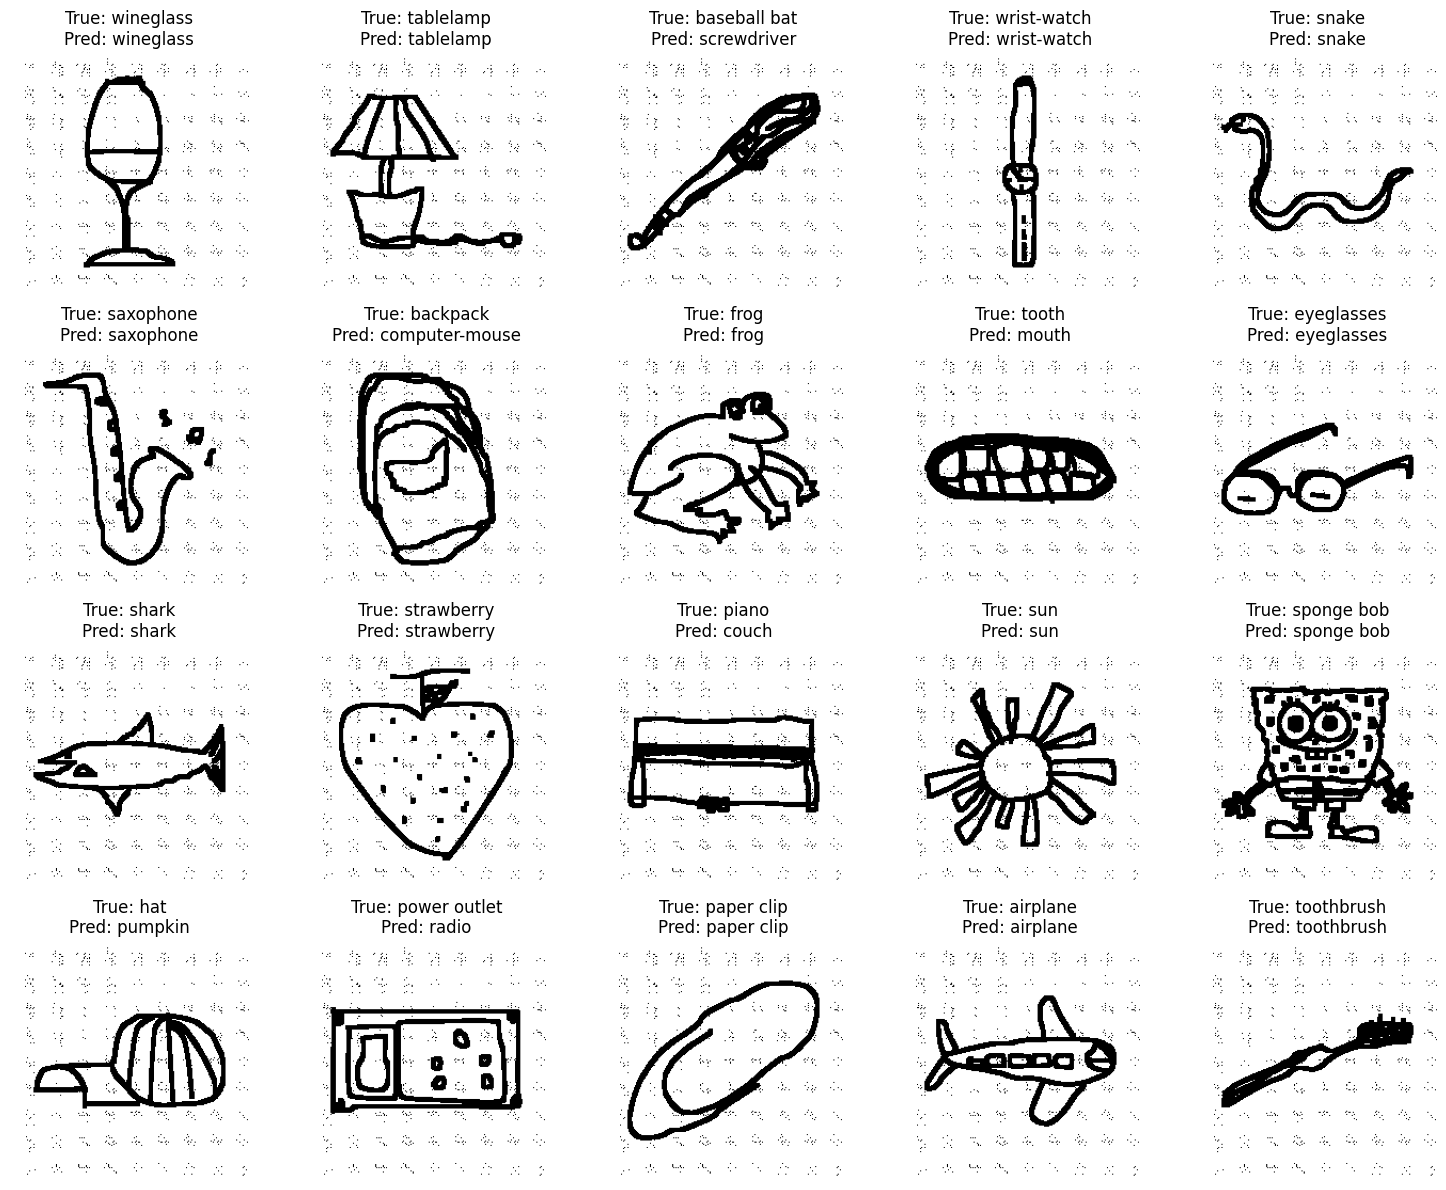

In [22]:
validate_model()

In [23]:
oneimg=np.load("X_test.npz")

In [44]:
oneimg

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

Mean Squared Error (MSE): 6.598981880623061e-18
Structural Similarity Index (SSIM): 1.0


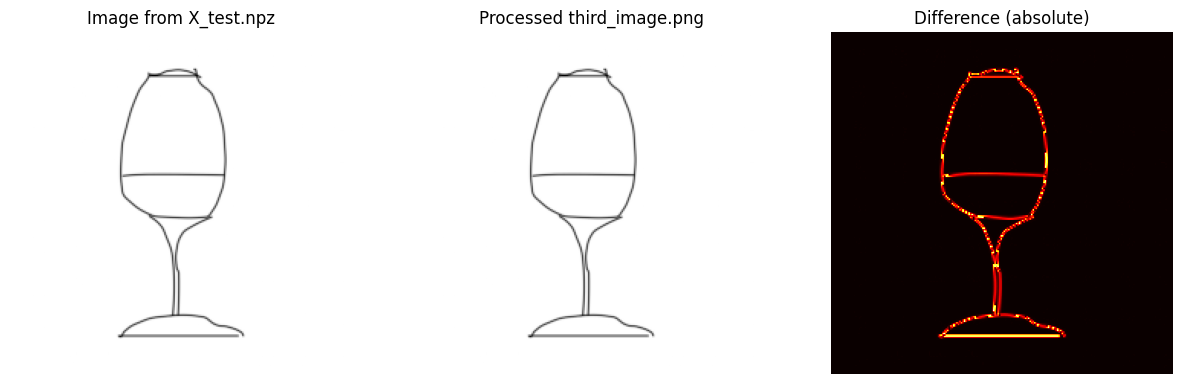

In [82]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize  # Ensure scikit-image is installed

# Set target size
target_size = (224, 224)

# Load the images
oneimg = np.load("X_test.npz")["images"][0]
image_path = 'third_image.png'

# Open and process 'third_image.png' as specified
with Image.open(image_path) as img:
    img_array = np.array(img.convert('L'), dtype=np.uint8)
    img_array = resize(img_array, target_size, anti_aliasing=True)
    img_array = (img_array * 255).astype(np.uint8) / 255.0  # Normalize to 0-1

# Calculate Mean Squared Error (MSE)
mse = np.mean((oneimg - img_array) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Structural Similarity Index (SSIM)
ssim_value = ssim(oneimg, img_array, data_range=img_array.max() - img_array.min())
print(f"Structural Similarity Index (SSIM): {ssim_value}")

# Display difference image for visual inspection
difference = np.abs(oneimg - img_array)

plt.figure(figsize=(15, 5))

# Original image from X_test.npz
plt.subplot(1, 3, 1)
plt.imshow(oneimg, cmap='gray')
plt.title("Image from X_test.npz")
plt.axis("off")

# Processed third_image.png
plt.subplot(1, 3, 2)
plt.imshow(img_array, cmap='gray')
plt.title("Processed third_image.png")
plt.axis("off")

# Difference Image
plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='hot')
plt.title("Difference (absolute)")
plt.axis("off")

plt.show()


Mean Squared Error (MSE): 6.598981880623061e-18
Structural Similarity Index (SSIM): 1.0


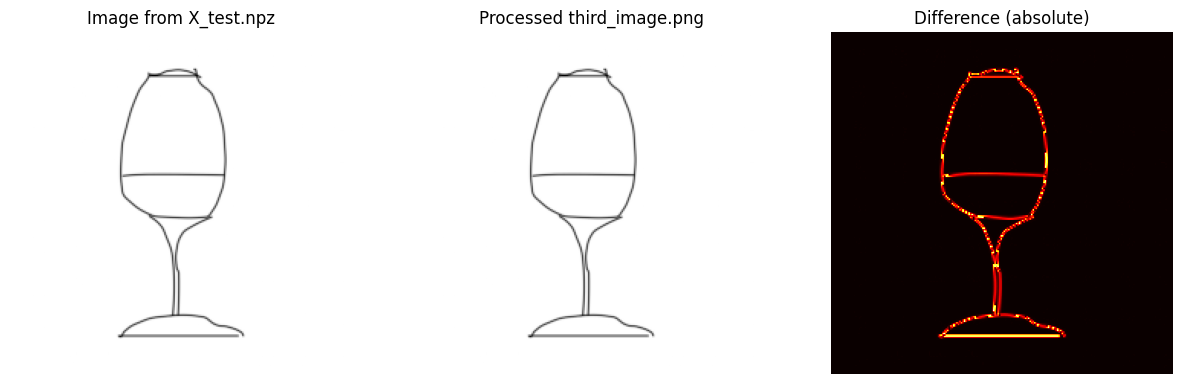

C:\Users\Hoyath Personal\AppData\Local\Temp\ipykernel_9776\270076831.py:102: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_l


Predictions for 'oneimg' from X_test.npz:
  1. Label: mouse (animal), Probability: 0.0078
  2. Label: church, Probability: 0.0067
  3. Label: bed, Probability: 0.0064
  4. Label: teapot, Probability: 0.0062
  5. Label: parking meter, Probability: 0.0060

Predictions for 'third_image.png':
  1. Label: mouse (animal), Probability: 0.0078
  2. Label: church, Probability: 0.0067
  3. Label: bed, Probability: 0.0064
  4. Label: teapot, Probability: 0.0062
  5. Label: parking meter, Probability: 0.0060


In [91]:
import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import efficientnet_b0
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from skimage.transform import resize  # Ensure scikit-image is installed

# Set target size for resizing
target_size = (224, 224)
label_map = {str(i): label for i, label in enumerate(["airplane", "alarm clock", "angel", "ant", "apple", "arm", "armchair", "ashtray", "axe", "backpack", "banana", "barn", "baseball bat", "basket", "bathtub", "bear (animal)", "bed", "bee", "beer-mug", "bell", "bench", "bicycle", "binoculars", "blimp", "book", "bookshelf", "boomerang", "bottle opener", "bowl", "brain", "bread", "bridge", "bulldozer", "bus", "bush", "butterfly", "cabinet", "cactus", "cake", "calculator", "camel", "camera", "candle", "cannon", "canoe", "car (sedan)", "carrot", "castle", "cat", "cell phone", "chair", "chandelier", "church", "cigarette", "cloud", "comb", "computer monitor", "computer-mouse", "couch", "cow", "crab", "crane (machine)", "crocodile", "crown", "cup", "diamond", "dog", "dolphin", "donut", "door", "door handle", "dragon", "duck", "ear", "elephant", "envelope", "eye", "eyeglasses", "face", "fan", "feather", "fire hydrant", "fish", "flashlight", "floor lamp", "flower with stem", "flying bird", "flying saucer", "foot", "fork", "frog", "frying-pan", "giraffe", "grapes", "grenade", "guitar", "hamburger", "hammer", "hand", "harp", "hat", "head", "head-phones", "hedgehog", "helicopter", "helmet", "horse", "hot air balloon", "hot-dog", "hourglass", "house", "human-skeleton", "ice-cream-cone", "ipod", "kangaroo", "key", "keyboard", "knife", "ladder", "laptop", "leaf", "lightbulb", "lighter", "lion", "lobster", "loudspeaker", "mailbox", "megaphone", "mermaid", "microphone", "microscope", "monkey", "moon", "mosquito", "motorbike", "mouse (animal)", "mouth", "mug", "mushroom", "nose", "octopus", "owl", "palm tree", "panda", "paper clip", "parachute", "parking meter", "parrot", "pear", "pen", "penguin", "person sitting", "person walking", "piano", "pickup truck", "pig", "pigeon", "pineapple", "pipe (for smoking)", "pizza", "potted plant", "power outlet", "present", "pretzel", "pumpkin", "purse", "rabbit", "race car", "radio", "rainbow", "revolver", "rifle", "rollerblades", "rooster", "sailboat", "santa claus", "satellite", "satellite dish", "saxophone", "scissors", "scorpion", "screwdriver", "sea turtle", "seagull", "shark", "sheep", "ship", "shoe", "shovel", "skateboard", "skull", "skyscraper", "snail", "snake", "snowboard", "snowman", "socks", "space shuttle", "speed-boat", "spider", "sponge bob", "spoon", "squirrel", "standing bird", "stapler", "strawberry", "streetlight", "submarine", "suitcase", "sun", "suv", "swan", "sword", "syringe", "t-shirt", "table", "tablelamp", "teacup", "teapot", "teddy-bear", "telephone", "tennis-racket", "tent", "tiger", "tire", "toilet", "tomato", "tooth", "toothbrush", "tractor", "traffic light", "train", "tree", "trombone", "trousers", "truck", "trumpet", "tv", "umbrella", "van", "vase", "violin", "walkie talkie", "wheel", "wheelbarrow", "windmill", "zebra"])}

# Load the images
oneimg = np.load("X_test.npz")["images"][0]
image_path = 'third_image.png'

# Open and process 'third_image.png' as specified
with Image.open(image_path) as img:
    img_array = np.array(img.convert('L'), dtype=np.uint8)  # Convert to grayscale
    img_array = resize(img_array, target_size, anti_aliasing=True)  # Resize
    img_array = (img_array * 255).astype(np.uint8) / 255.0  # Normalize to 0-1

# Calculate Mean Squared Error (MSE)
mse = np.mean((oneimg - img_array) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Structural Similarity Index (SSIM)
ssim_value = ssim(oneimg, img_array, data_range=img_array.max() - img_array.min())
print(f"Structural Similarity Index (SSIM): {ssim_value}")

# Display difference image for visual inspection
difference = np.abs(oneimg - img_array)

plt.figure(figsize=(15, 5))

# Original image from X_test.npz
plt.subplot(1, 3, 1)
plt.imshow(oneimg, cmap='gray')
plt.title("Image from X_test.npz")
plt.axis("off")

# Processed third_image.png
plt.subplot(1, 3, 2)
plt.imshow(img_array, cmap='gray')
plt.title("Processed third_image.png")
plt.axis("off")

# Difference Image
plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='hot')
plt.title("Difference (absolute)")
plt.axis("off")

plt.show()




# Define the EfficientNetB0 model for single-channel input
class EfficientNetB0SingleChannel(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetB0SingleChannel, self).__init__()
        self.model = self.get_efficientnet_b0_single_channel(num_classes)

    def get_efficientnet_b0_single_channel(self, num_classes):
        # Load the pre-trained EfficientNet-B0 model
        efficientnet = efficientnet_b0(pretrained=True)

        # Modify the first convolutional layer to accept single-channel input
        original_conv1 = efficientnet.features[0][0]
        efficientnet.features[0][0] = nn.Conv2d(
            in_channels=1,
            out_channels=original_conv1.out_channels,
            kernel_size=original_conv1.kernel_size,
            stride=original_conv1.stride,
            padding=original_conv1.padding,
            bias=(original_conv1.bias is not None)
        )

        # Copy and average the weights from the original conv1 layer
        with torch.no_grad():
            efficientnet.features[0][0].weight = nn.Parameter(
                original_conv1.weight.mean(dim=1, keepdim=True)
            )

        # Replace the final fully connected layer to match the number of classes
        efficientnet.classifier[1] = nn.Linear(efficientnet.classifier[1].in_features, num_classes)

        return efficientnet

    def forward(self, x):
        return self.model(x)

# Load the model function
def load_model(model_path, num_classes=250, device=None):
    model = EfficientNetB0SingleChannel(num_classes)
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.load_state_dict(torch.load(model_path, map_location=device), strict=False)
    model.to(device)
    model.eval()
    return model

# Define the transformation function
def get_transforms():
    return transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor(),           # Convert to tensor
        transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
    ])

# Preprocess the image for prediction
def preprocess_image(image, transforms):
    if isinstance(image, np.ndarray):
        # If the image is a numpy array, convert it to a PIL image first
        image = Image.fromarray((image * 255).astype(np.uint8))  # Convert normalized numpy array back to 0-255
    image = image.convert('L')  # Ensure grayscale
    image = transforms(image)  # Apply transformations
    image = image.unsqueeze(0)  # Add batch dimension
    return image

# Classify the image
def classify_image(model, input_tensor, device):
    with torch.no_grad():  # No need to compute gradients
        input_tensor = input_tensor.to(device)
        outputs = model(input_tensor)  # Get model predictions
        probabilities = torch.softmax(outputs, dim=1)  # Apply softmax to get probabilities
        top_probs, top_classes = torch.topk(probabilities, k=5)  # Get top 5 predictions
    return top_probs.cpu().numpy(), top_classes.cpu().numpy()

# Get predictions from the output
# Map predictions to labels using label_map
def get_predictions(top_probs, top_classes, label_map):
    return [{"label": label_map[str(cls)], "probability": prob} for cls, prob in zip(top_classes[0], top_probs[0])]

# Update the predict_images function to use the label_map
def predict_images():
    model_path = "efficientnet.pth"  # Path to the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set device
    transforms = get_transforms()  # Get transformations
    
    # Load the model
    model = load_model(model_path, num_classes=250, device=device)
    
    # Process and classify 'oneimg' from X_test.npz
    input_tensor_oneimg = preprocess_image(oneimg, transforms)
    top_probs_oneimg, top_classes_oneimg = classify_image(model, input_tensor_oneimg, device)
    predictions_oneimg = get_predictions(top_probs_oneimg, top_classes_oneimg, label_map)
    
    # Process and classify 'third_image.png'
    input_tensor_third_image = preprocess_image(Image.open(image_path), transforms)
    top_probs_third_image, top_classes_third_image = classify_image(model, input_tensor_third_image, device)
    predictions_third_image = get_predictions(top_probs_third_image, top_classes_third_image, label_map)
    
    return {
        "Predictions for oneimg from X_test.npz": predictions_oneimg,
        "Predictions for third_image.png": predictions_third_image
    }

# Run the prediction function for both images
predictions = predict_images()

# Format and print predictions in a readable format
print("\nPredictions for 'oneimg' from X_test.npz:")
for idx, pred in enumerate(predictions["Predictions for oneimg from X_test.npz"], start=1):
    print(f"  {idx}. Label: {pred['label']}, Probability: {pred['probability']:.4f}")

print("\nPredictions for 'third_image.png':")
for idx, pred in enumerate(predictions["Predictions for third_image.png"], start=1):
    print(f"  {idx}. Label: {pred['label']}, Probability: {pred['probability']:.4f}")

